# Notas de Scikit-Learn

Machine Learning(Aprendizaje Automático), es una rama  de la inteligencia artificial que estudia el diseño de algoritmos que puedan aprender. 

Típicas tareas del machine learning son el aprendizaje de conceptos,el desarrollo de  modelos de predicción,  la búsqueda de patrones predictivos y el clustering. Estas tareas son aprendidas  a través de los datos disponibles observados  a través de experiencias o instrucciones. Podemos dividir los algoritmos  del machine learning en 3 categorias:

- **Aprendizaje supervisado**
- **Aprendizaje no supervisado**
- **Aprendizaje por refuerzo**
 
** [scikit](https://scikits.appspot.com/)**  es un conjunto de paquetes en Python, para temas específicos:

- scikit-image: Contiene rutina para procesamiento de imágenes en Scipy.
- scikit-monaco: Paquete relacionado a la integración de Montecarlo.
- timeseries: Un paquete para la manipulación de series de tiempo.
- scikit-learn: Un conjunto de módulos en Python, para Machine Learning y Data Minning.

La librería  [scikit-learn](scikit-learn.org/stable/a) proporciona una gran número de herramientas para la ciencia de datos y data minning en Python centrandose en el machine learning:

- scikit-learn posee excelente documentación como el  [tutorial](http://scikit-learn.org/stable/tutorial/basic/tutorial.html) inicial o los [ejemplos](http://scikit-learn.org/dev/auto_examples/index.html).
- Posee muchos de lo algoritmos del machine learning.
- Todo se trabaja sobre [github](https://github.com/scikit-learn/scikit-learn).
- Cada método implementado sobre sckit-learn asume que la data viene en un conjunto de datos. Sckit-learn incluye algunos conjuntos de datos conocidos.

### Datos de entrenamiento, validación y de prueba


- Los datos de entrenamiento(**training**): son los datos que entrenan los modelos
- Los datos de validación (**validation**) : elecciona el mejor de los modelos entrenados.
- Los datos de prueba (**testing**): Nos ofrece el error real cometido con el modelo seleccionado.

[Hastie, Tibshirani y Friedman](http://www-stat.stanford.edu/~tibs/ElemStatLearn/) en su libro *The Elements of Statistical Learning* indican que una división típica para estos conjuntos puede ser de 50% para el entrenamiento y 25% para la validación y prueba, respectivamente.

## API de scikit-learn

Los principales "interfaces" en scikit-learn son (una clase puede implementar múltiples interfaces):

- **Estimador**:    Un estimador es un objeto que se ajuste a un modelo basado en algunos datos de entrenamiento y es capaz de inferir algunas propiedades de los nuevos datos.

    `estimador = obj.fit(data, targets)` 
    
 
- **Predictor**:

    `prediccion = obj.predict(data)` 
    
    
- **Transformador**:

    `n_data = obj.transform(data)` 
    
    
- **Modelo**:

    `s = obj.score(data)`



In [21]:
# Ejemplos

from sklearn import datasets
from numpy import logical_or
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
subconjunto = logical_or(iris.target == 0, iris.target == 1)

X = iris.data[subconjunto]
y = iris.target[subconjunto]

# Creamos el modelo
model = LogisticRegression()

# Fijamos el modelo
model.fit(X, y)
print (model.coef_)

[[-0.40731745 -1.46092371  2.24004724  1.00841492]]


In [22]:
# Para aprendizaje no supervisado

from sklearn.cluster import KMeans

# Creamos el modelo
kmeans = KMeans(n_clusters = 2)

# Fijamos el modelo
kmeans.fit(X)
print (kmeans.cluster_centers_)

[[ 5.006  3.418  1.464  0.244]
 [ 5.936  2.77   4.26   1.326]]


In [24]:
# Reduccion de la dimension

from sklearn.decomposition import PCA

# Creamos el modelo
pca = PCA(n_components=2)

# Fijamos el modelo
pca.fit(X)
print (pca.explained_variance_)

[ 2.73946394  0.22599044]


In [25]:
# Predictores

model = LogisticRegression()
model.fit(X, y)

X_test = [[ 5.006,  3.418,  1.464,  0.244], [ 5.936,  2.77 ,  4.26 ,  1.326]]
model.predict(X_test)

array([0, 1])

In [26]:
print (model.predict_proba(X_test))

[[ 0.97741151  0.02258849]
 [ 0.01544837  0.98455163]]


In [30]:
# Ejemplo más avanzado de SVM,  usando SVC (support vector classification)

from sklearn import svm
digitos = datasets.load_digits()
clasificador = svm.SVC(gamma=0.001, C=100.)

# Fijamos el modelo

clasificador.fit(digitos.data[:-1], digitos.target[:-1])  

# Usamos los predictores en el modelo

clasificador.predict(digitos.data[-1:])


array([8])

In [33]:
# El metodo transform para aprendizaje no supervisado

pca = PCA(n_components=2)
pca.fit(X)

print (pca.transform(X)[0:5,:])

[[-1.65441341 -0.20660719]
 [-1.63509488  0.2988347 ]
 [-1.82037547  0.27141696]
 [-1.66207305  0.43021683]
 [-1.70358916 -0.21574051]]


In [36]:
# El metodo fit.transform

pca = PCA(n_components=2)
print (pca.fit_transform(X)[0:5,:])


[[-1.65441341 -0.20660719]
 [-1.63509488  0.2988347 ]
 [-1.82037547  0.27141696]
 [-1.66207305  0.43021683]
 [-1.70358916 -0.21574051]]


In [37]:
# Ejemplo sobre el metodo Model

# Utilizamos DummyClassifier un clasificador que hace predicciones simples

from sklearn.dummy import DummyClassifier

model = DummyClassifier()
model.fit(X, y)

model.score(X, y)


0.45000000000000001

## Algoritmos en machine learning

### Aprendizaje supervisado


Estos algoritmos consisten en una variable de salida/resultado (o variable dependiente) que ha de ser predicha a partir de un conjunto dado de predictores (variables independientes). Usando  este conjunto de variables, generamos una función que se asignan las entradas a las salidas deseadas. El proceso de formación continúa hasta que el modelo alcanza un nivel deseado de precisión en los datos de entrenamiento. Algunos ejemplos:

- [**Linear Regression**](https://jeremykun.com/2013/08/18/linear-regression/).
- [** Logistic Regression**](http://blog.yhat.com/posts/logistic-regression-and-python.html).
- [**KNN**](https://jeremykun.com/2012/08/26/k-nearest-neighbors-and-handwritten-digit-classification/).
- [**Random Forest**](http://www.analyticsvidhya.com/blog/2014/06/introduction-random-forest-simplified/).

### Aprendizaje no supervisado

En estos algoritmos, no tenemos ninguna variable objetivo o resultado para predecir/estimar. Se utiliza para la agrupación de la población en  diferentes grupos, lo que  es ampliamente utilizado para la segmentación de clientes en diferentes grupos por intervención específica. Algunos ejemplos :

- [**K-Means**](https://jeremykun.com/2012/10/08/decision-trees-and-political-party-classification/).
- [**Dimensionality Reduction Algorithms**](http://www.kdnuggets.com/2015/05/7-methods-data-dimensionality-reduction.html).

### Aprendizaje por refuerzo

Utilizando este algoritmo, la máquina está capacitada para tomar decisiones específicas. Funciona de la siguiente manera: la máquina está expuesta a un ambiente donde se entrena a sí misma continuamente mediante ensayo y error. Esta máquina aprende de la experiencia pasada y trata de captar el mejor conocimiento posible para tomar decisiones de negocio precisos. Un ejemplo:

- Procesos de decisión de Markov.
- Metodos de Montecarlo.


### Regresión lineal

Se utiliza para estimar los valores reales (costo de las casas, número de llamadas, las ventas totales, etc.) en base a la variables continuas. Aquí se establece una  relación entre las variables dependientes e independientes ajustando una  línea. Esta línea de mejor ajuste se conoce como `línea de regresión` y  es representado por una ecuación lineal:

```
Y = a*X + b

```

En esta ecuación:

- `Y` : Variable dependiente
- `a` : Pendiente
- `X` : Variable independiente
- `b` : Intercepto


Estos coeficientes a y b son derivados basados en la minimización de la suma de la diferencias de cuadrados de la distancia entre los puntos de los datos y la línea de regresión.

La regresión lineal es principalmente de dos tipos: `regresión lineal simple` y `regresión lineal múltiple`.

La regresión lineal simple se caracteriza por una variable independiente, mientras que la  regresión lineal múltiple se caracteriza por múltiples variables independientes, además para encontrar  la mejor línea de ajuste, podemos fijar  una `regresión polinómica` o `curvilínea`. 

In [9]:
# Ejemplo: Pablo Fernández

from sklearn import datasets

# boston es un conjunto de datos para el análisis de los precios de las viviendas  de Boston.
# El conjunto de datos tiene 506 muestras y 13 atributos
boston = datasets.load_boston() 


from sklearn.linear_model import LinearRegression
rl = LinearRegression(normalize=True) 

# Como sabemos el modelo a utilizar, usamos los estimadores

rl.fit(boston.data, boston.target)

# Veamos como los coeficientes que han sido asignados a cada atributo

for (feature, coef) in zip(boston.feature_names, rl.coef_):
    print('{:>7}: {: 9.5f}'.format(feature, coef))

   CRIM:  -0.10717
     ZN:   0.04640
  INDUS:   0.02086
   CHAS:   2.68856
    NOX: -17.79576
     RM:   3.80475
    AGE:   0.00075
    DIS:  -1.47576
    RAD:   0.30566
    TAX:  -0.01233
PTRATIO:  -0.95346
      B:   0.00939
  LSTAT:  -0.52547


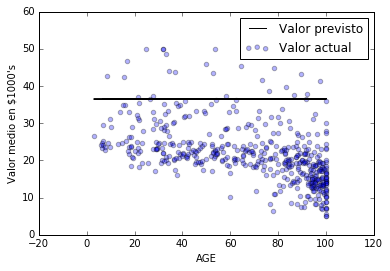

In [12]:
# Visualicemos los datos

#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot_feature(feature):
    f = (boston.feature_names == feature)
    plt.scatter(boston.data[:,f], boston.target, c='b', alpha=0.3)
    plt.plot(boston.data[:,f], boston.data[:,f]*rl.coef_[f] + rl.intercept_, 'k')
    plt.legend(['Valor previsto', 'Valor actual'])
    plt.xlabel(feature)
    plt.ylabel("Valor medio en $1000's")
plot_feature('AGE')

## Un ejemplo:

El conjunto de datos tiene 150 instancias y 4 atributos. En nuestro primer paso, separamos el conjunto de datos , usando el %75 de la instancia para 'entrenar' nuestro clasificador y el 25% para evaluarlos.

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris, Y_iris = iris.data, iris.target
print (X_iris.shape, Y_iris.shape)
print(X_iris[0], Y_iris[0])

(150, 4) (150,)
[ 5.1  3.5  1.4  0.2] 0


Estamos evaluando  ahora dos caracteristicas de `iris`: sepal width, sepal length de manera aleatoria el conjunto de evalaución. También calculamos el promedio, retamos el valor medio desde el valor caracteristico y dividimos el resultado por la desviacion estandar (Estandarización de valores).


In [25]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Conseguimos el conjunto de datos solo con los dos primeros
# atributos

X,Y =X_iris[:, :2], Y_iris

# Dividir el conjunto de datos en conjuntos de entrenamiento 
# testing

X_entrenamiento, X_test, Y_entrenamiento, Y_test \
= train_test_split(X, Y, test_size = 0.25, random_state=34)
print(X_entrenamiento.shape, Y_entrenamiento.shape)

# Estandarizacion

scaler = StandardScaler().fit(X_entrenamiento)
X_entrenamiento = scaler.transform(X_entrenamiento)

X_test =scaler.transform(X_test)
# Graficando los datos de entranamiento usando pyplot

colores = ['red', 'green', 'blue']
for i in range(len(colores)):
    px =X_entrenamiento[:,0][Y_entrenamiento == i]
    py =X_entrenamiento[:, 1][Y_entrenamiento ==i]
    plt.scatter(px, py, c =colores[i])

plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

(112, 2) (112,)


 La setosa es facilmente separable de las otras dos clases mientras que versicolor y virginica son muy desordenadas. Para implementar una clasificacion lineal, usamos `SGDClassifier` desde Scikit-learn.
 
 SGD  es el método del *descenso de gradiente estocástico*  que es muy útil para encontrar mínimos locales de una función.

In [ ]:
# Creamos un modelo lineal clasificatorio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()

#fijamos el clasificador (entrenamiento)
clf.fit(X_entrenamiento, Y_entrenamiento)

# Imprimimos los coeficientes del hiperplano que minimiza 
# loss function(funcion de perdida)

print(clf.coef_)
print(clf.intercept_)

# Dibujar las 3 curvas de decision 

x_min, x_max = X_entrenamiento[:,0].min() -.5, X_entrenamiento[:,0].max() + .5
y_min, y_max = X_entrenamiento[:,1].min() -.5, X_entrenamiento[:,1].max() + .5

xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1,3)
fig.set_size_inches(10,6)

for i in [0,1,2]:
    axes[i].set_aspect("equal")
    axes[i].set_title('Clase' + str(i) + 'versus el resto')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    axes[i].set_xlabel("Longitud Sepal")
    axes[i].set_ylabel("Ancho Sepal")
    
    plt.sca(axes[i])
    
    for j in range(len(colores)):
        px =X_entrenamiento[:,0][Y_entrenamiento == j]
        py =X_entrenamiento[:, 1][Y_entrenamiento ==j]
        plt.scatter(px, py, c =colores[j])

    ys = (-clf.intercept_[i] -xs*clf.coef_[i,0])/clf.coef_[i,1]
    plt.plot(xs, ys, hold =True)
plt.show()

[[-28.67108892  22.96191474]
 [-11.32002052 -14.57276498]
 [  3.79132988   8.15912468]]
[-26.45480613  -9.95033872  -8.79589017]
